In [1]:
import sunpy.map
from aiapy.calibrate import normalize_exposure, register, update_pointing
import numpy as np

In [2]:
AIA_filename = "data/AIA/aia_lev1_304a_2011_01_27t22_58_56_12z_image_lev1.fits"
m_aia = sunpy.map.Map(AIA_filename)
m_normalized = normalize_exposure(register(update_pointing(m_aia)))

Observatory,SDO
Instrument,AIA 4
Detector,AIA
Measurement,304.0 Angstrom
Wavelength,304.0 Angstrom
Observation Date,2011-01-27 22:58:56
Exposure Time,2.902162 s
Dimension,[4096. 4096.] pix
Coordinate System,helioprojective
Scale,[0.600165 0.600165] arcsec / pix
Reference Pixel,[2053.260986 2023.139771] pix

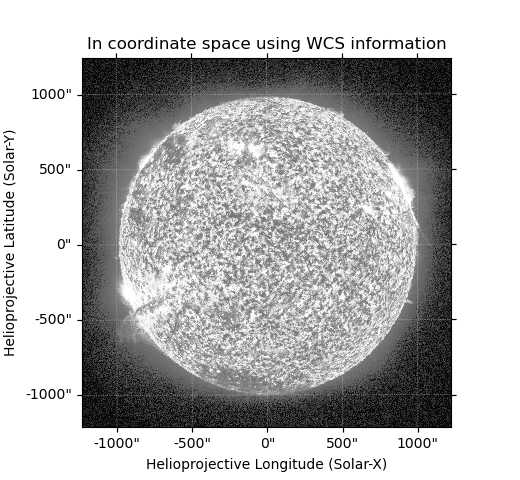
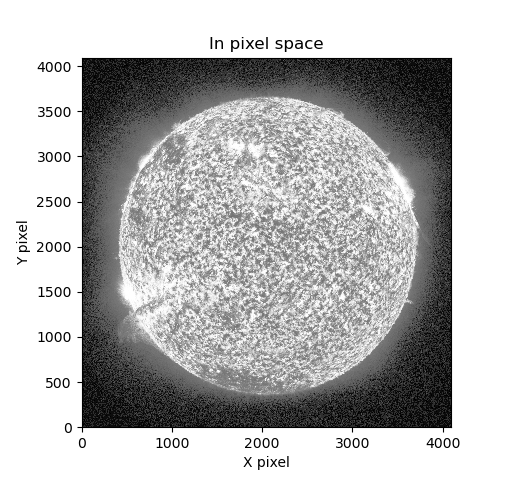
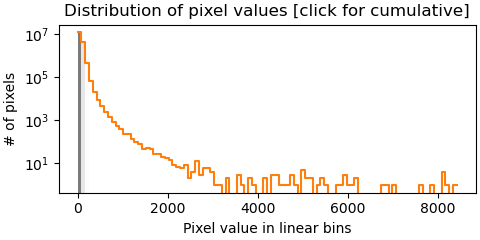
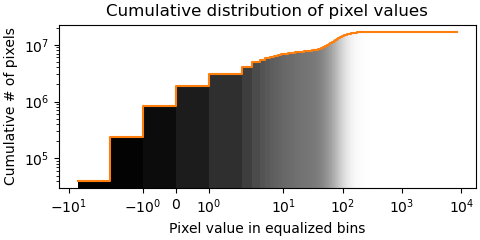

In [4]:
m_aia

In [5]:
m_aia.data.sum()

834184490

Observatory,SDO
Instrument,AIA 4
Detector,AIA
Measurement,304.0 Angstrom
Wavelength,304.0 Angstrom
Observation Date,2011-01-27 22:58:56
Exposure Time,1.0 s
Dimension,[4096. 4096.] pix
Coordinate System,helioprojective
Scale,[0.6 0.6] arcsec / pix
Reference Pixel,[2047.5 2047.5] pix

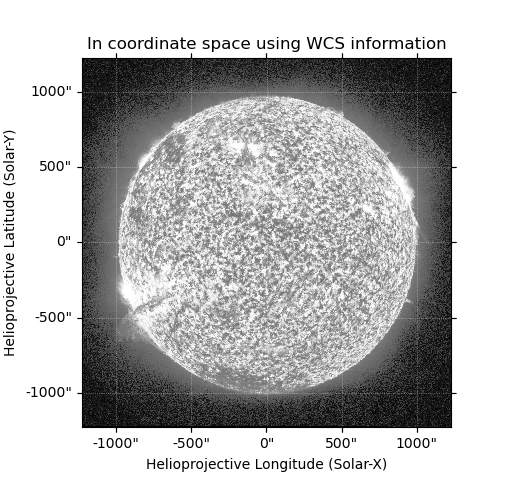
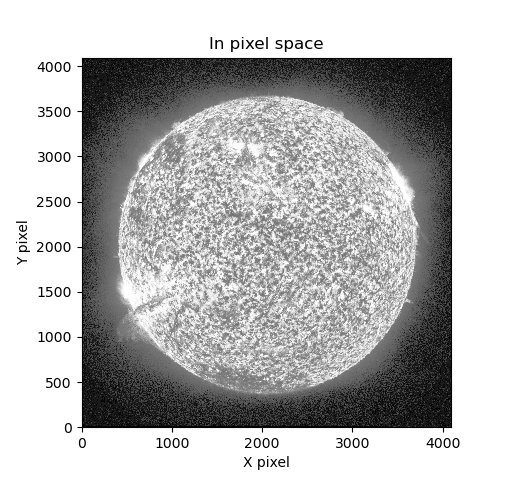
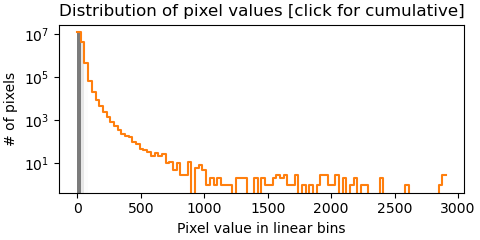
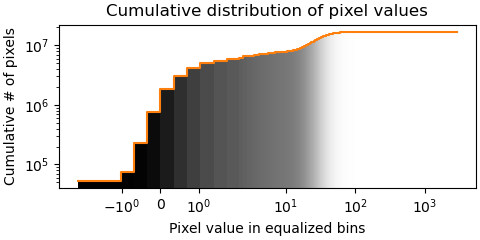

In [3]:
m_normalized

In [6]:
m_normalized.data.sum()

287455195.8160849

In [7]:
m_aia.data.sum()/m_normalized.data.sum()

2.9019635134155477

In [6]:
image_data=m_normalized.data

In [7]:
np.savez("data/AIA/image_data_4096_normalized.npz", image_data=image_data)
#标准化为一秒钟

In [8]:
m_nonnormal=register(update_pointing(m_aia))

In [9]:
image_data=m_nonnormal.data

In [10]:
np.savez("data/AIA/image_data_4096_nonnormal.npz", image_data=image_data)
#未标准化为一秒